# Support Vector Classifier

### Importing Libraries

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

### Importing the data

In [30]:
iris = datasets.load_iris()

### Getting independent and dependent variables

In [31]:
# we only take the first two features(sepal_length, sepal width)
X = iris.data[:, :2]

# Target variable "Species"
y = iris.target

### Visualising classification regions

The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.

In [32]:
# :imit for the X-axis and the Y-axis
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = (x_max / x_min)/100 # Can also just take h = 0.01 as a standard practice

# Defining the meshgrid with above parameters
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

### Plotting the Regions

#### 1. SVC (Default)
The default kernel is Gaussian. Let us see it!

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X, y)

SVC()

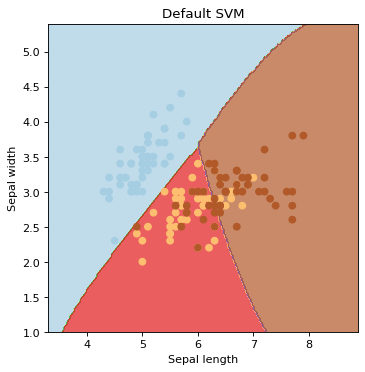

In [34]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Default SVM')
plt.show()

#### 2. Linear SVM

In [35]:
svc = SVC(kernel = 'linear')
svc.fit(X, y)

SVC(kernel='linear')

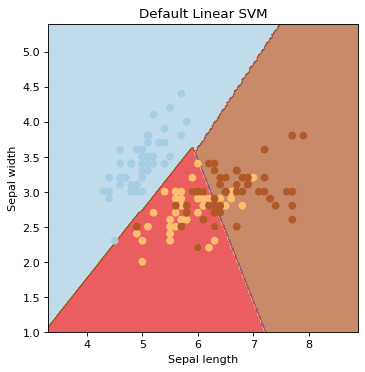

In [36]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Default Linear SVM')
plt.show()

We can clearly see that Linear SVM creates the classification curve which is linear or a straight line. therfore misclassification isunavoidable and prominent.

#### 3. Polynomial kernel SVM

In [37]:
svc = SVC(kernel = 'poly')
svc.fit(X, y)

SVC(kernel='poly')

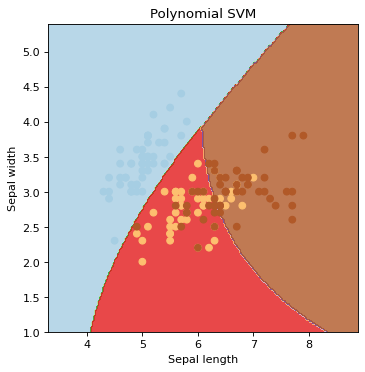

In [38]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Polynomial SVM')
plt.show()

A polynomial kernel is able to capture non-linear relations with it's most prominent parameter being the degree of the polynomial features.
Following are polynomial kernels with different degrees.

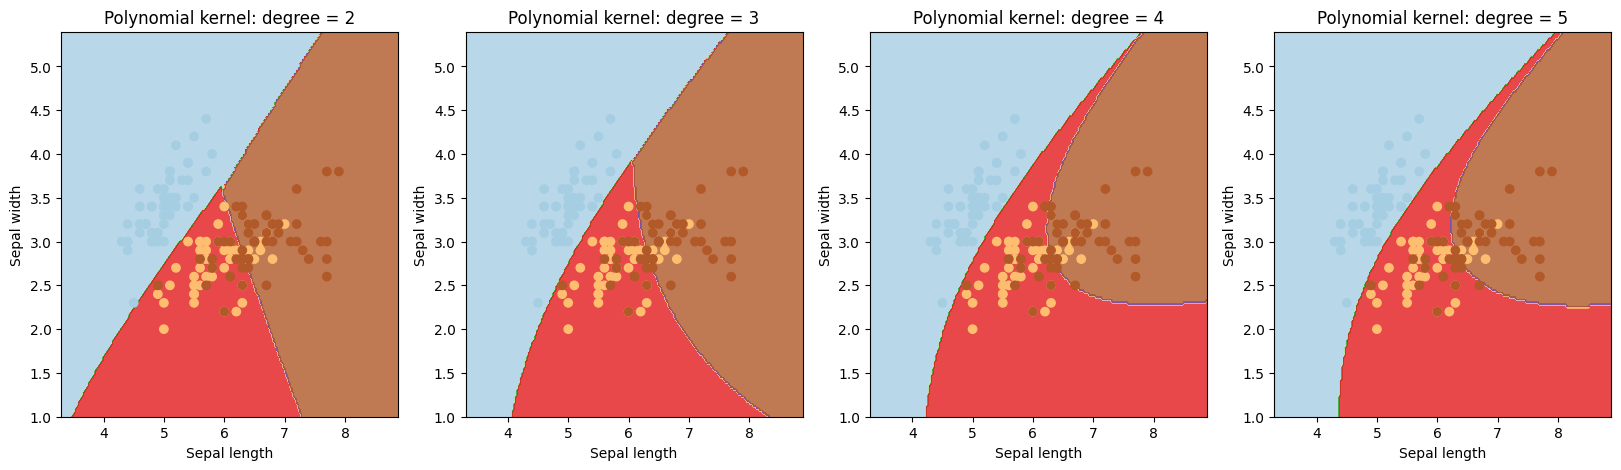

In [39]:
plt.figure(figsize = (20,5))


for i in range(2,6):
  svc = SVC(kernel = 'poly', degree = i)
  svc.fit(X, y)

  plt.subplot(1,4,i-1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

  
  plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('Polynomial kernel: degree = '+ str(i))

plt.show()

As the polynomial degree increases, the separating boundary becomes more intricate and complex. Additionally, running the model with a degree of 5 took noticeably longer, even for a small dataset. This reinforces the fact that the polynomial kernel demands significant computational power.

#### SVM with Gaussian kernel

In [40]:
svc = SVC(kernel = 'rbf')
svc.fit(X, y)

SVC()

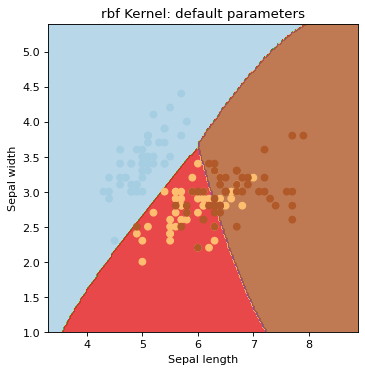

In [41]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('rbf Kernel: default parameters')
plt.show()

The performance of the RBF kernel in SVC is influenced by two key parameters:

1) "C" (Regularization Parameter) – Controls the trade-off between maximizing the margin and minimizing classification errors.

2) "Gamma" – Determines the influence of individual training points, affecting the decision boundary's complexity.

Now, let's explore how these parameters impact the SVC model.

Change w.r.t parameter "Gamma" (C = const)

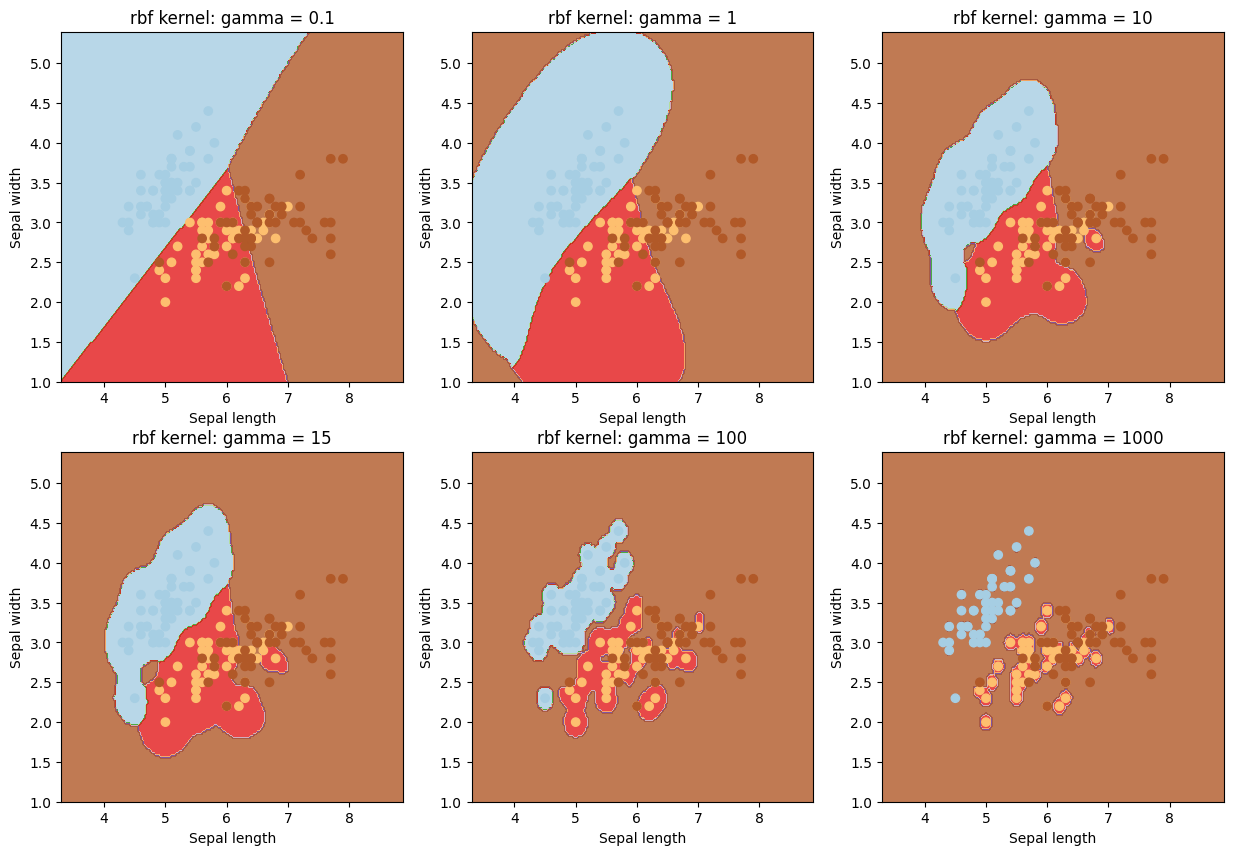

In [42]:
plt.figure(figsize = (15,10))

g = [0.1,1,10,15,100,1000]
for i in range(len(g)):
  svc = SVC(kernel = 'rbf', gamma = g[i])
  svc.fit(X, y)

  plt.subplot(2,3,i+1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

  
  plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('rbf kernel: gamma = '+ str(g[i]))

plt.show()

A very small Gamma value in SVC behaves similarly to a linear SVC. However, as Gamma increases, the classification improves but can lead to overfitting when set too high.

Notably, when Gamma = 1000, the model exhibits extreme overfitting—each point is classified perfectly and nearly isolated within circular decision boundaries.

#### Change w.r.t parameter C (Gamma = const)

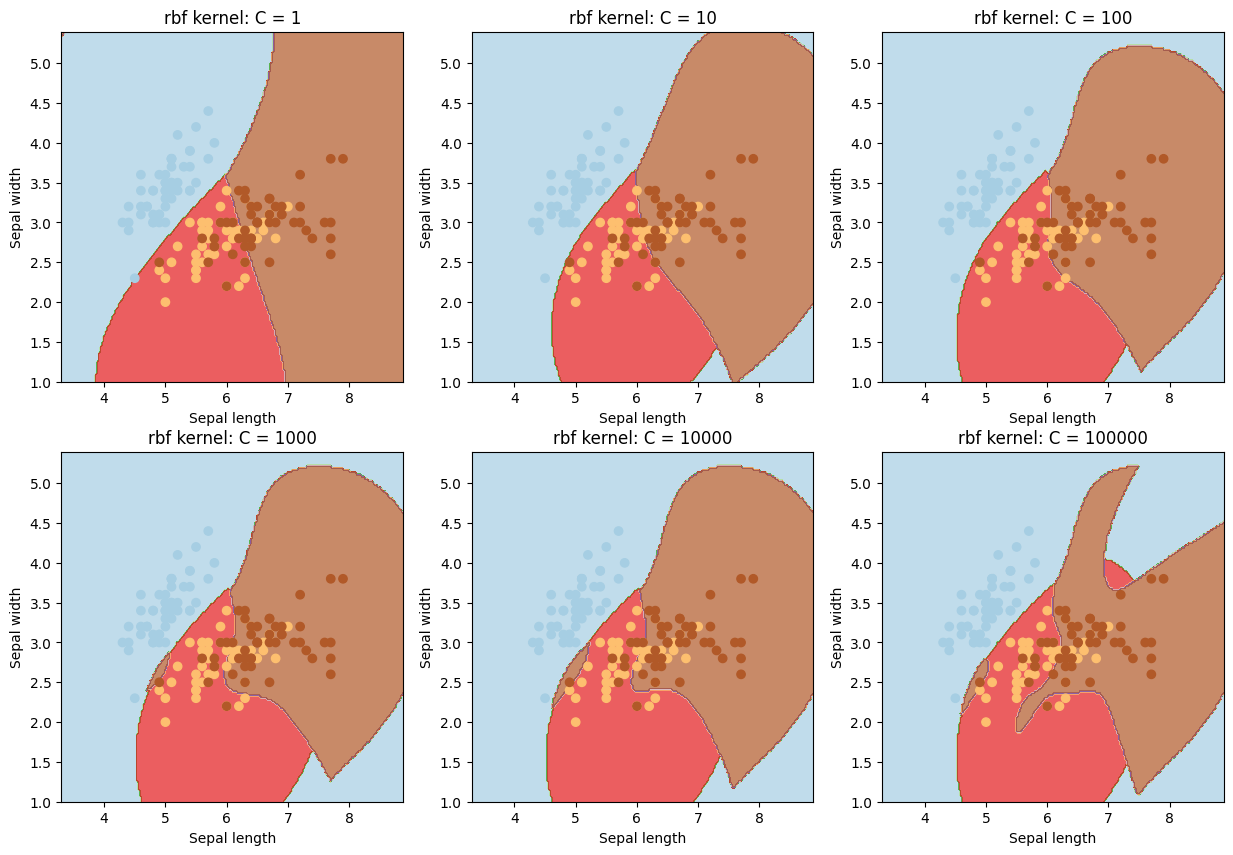

In [ ]:
plt.figure(figsize = (15,10))

c =[1,10,100,1000,10000,100000]
for i in range(len(c)):
  svc = SVC(kernel = 'rbf', C = c[i], gamma=0.5)
  svc.fit(X, y)

  plt.subplot(2,3,i+1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

  plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('rbf kernel: C = '+ str(c[i]))

plt.show()